In [ ]:
# we imported necessary
import pandas as pd
import numpy as np
df = pd.read_csv('https://query.data.world/s/cza7egktpbxtfzumrrwroulnlefdkp?dws=00000')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


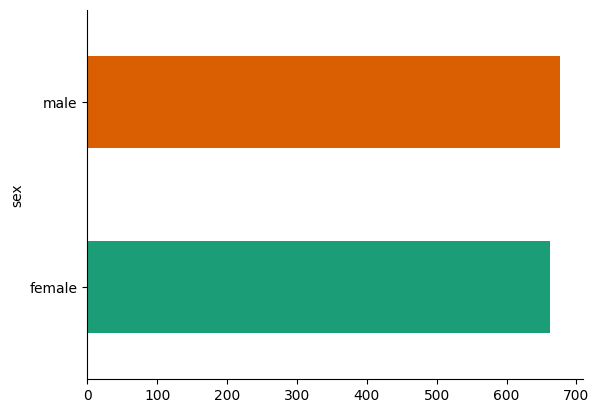

In [ ]:
# @title sex
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

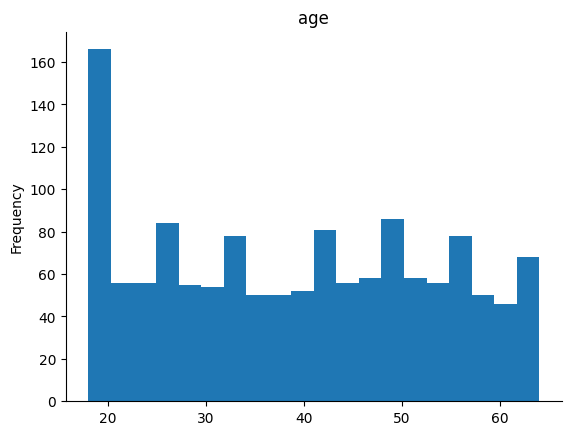

In [ ]:
# @title age
from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-12-fb41527df7f8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='children', y='sex', inner='box', palette='Dark2')


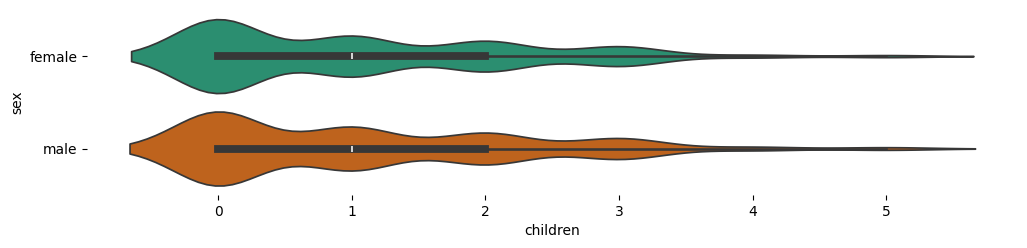

In [ ]:
# @title sex vs children
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='children', y='sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# dump data into csv file
df.to_csv("bob-wakefield_insurance.csv")

In [ ]:
# droped bmi column
#df.drop(columns=["bmi"], inplace=True)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# replace sex columns inside data converted into binary using replace function
df["sex"].replace({"female":"1", "male":"0"}, inplace=True)

<ipython-input-17-d3519eab26cf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sex"].replace({"female":"1", "male":"0"}, inplace=True)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# replace smoker columns inside data converted into binary using replace function
df["smoker"].replace({"yes": 1, "no":0} ,inplace=True)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [ ]:
# check how much values with categories
df["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [ ]:
# transform/Label encoder/ categorical data convert into binary form using labelEncoder
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
df['region']=lr.fit_transform(df['region'])

In [ ]:
#check classes
lr.classes_

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


In [ ]:
df["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [ ]:
# get region name and binary value given
def getlabelencoder(n):
  if n==3:
    return f"southwest : {n}"
  elif n==2:
    return f"southeast : {n}"
  elif n==1:
    return f"northwest : {n}"
  elif n==0:
    return f"northeast : {n}"

for i in df["region"]:
  print(getlabelencoder(i), end=" ")



southwest : 3 southeast : 2 southeast : 2 northwest : 1 northwest : 1 southeast : 2 southeast : 2 northwest : 1 northeast : 0 northwest : 1 northeast : 0 southeast : 2 southwest : 3 southeast : 2 southeast : 2 southwest : 3 northeast : 0 northeast : 0 southwest : 3 southwest : 3 northeast : 0 southwest : 3 southeast : 2 northeast : 0 northwest : 1 southeast : 2 northeast : 0 northwest : 1 northwest : 1 southwest : 3 southwest : 3 northeast : 0 southwest : 3 northwest : 1 southwest : 3 northwest : 1 northwest : 1 southwest : 3 northeast : 0 southwest : 3 northeast : 0 southeast : 2 southeast : 2 southeast : 2 northeast : 0 southwest : 3 northeast : 0 northwest : 1 southeast : 2 southeast : 2 northeast : 0 northwest : 1 southwest : 3 southeast : 2 northwest : 1 northwest : 1 northeast : 0 southeast : 2 southeast : 2 northwest : 1 northeast : 0 southeast : 2 northwest : 1 northwest : 1 northwest : 1 southwest : 3 southwest : 3 northwest : 1 southeast : 2 southeast : 2 southeast : 2 northe

In [ ]:
# region column after encoded values
# northeast : 0
# southeast : 2
# southwest : 3
# northwest : 1

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


In [ ]:
# feature selelction using iloc method
X=df.iloc[:,0:6]
y=df.iloc[:,-1]

In [ ]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,3
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,1
4,32,0,28.880,0,0,1


In [ ]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
# split data into X_train, y_train using train_test_split
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
#check shape
X_test.shape

(268, 6)

In [ ]:
#check shape
X_train.shape

(1070, 6)

In [ ]:
#import linear_model
from sklearn import linear_model

In [ ]:
# intializing LinearRegression instance
model=linear_model.LinearRegression()

In [ ]:
# put features in LinearRegression model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# check coefficent
model.coef_

array([ 2.57056264e+02,  1.87914567e+01,  3.35781491e+02,  4.25091456e+02,
        2.36478181e+04, -2.71284266e+02])

In [ ]:
# check intercept
model.intercept_

np.float64(-11965.398023961936)

In [ ]:
# predict model for testing using X_test
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# check LinearRegression Algorithm model score using r2_score
r2_score(y_pred,y_test)

0.7086166433516323

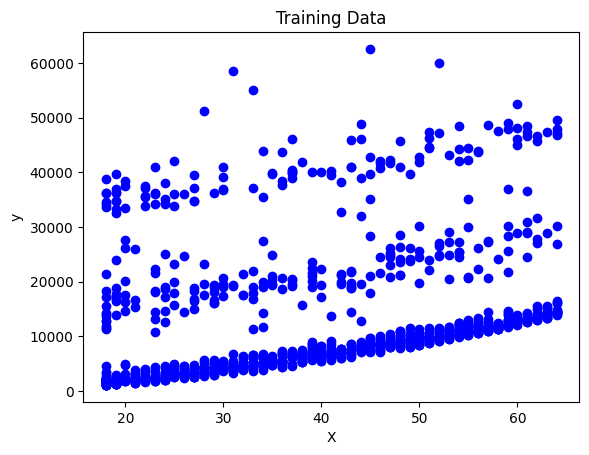

In [ ]:
import matplotlib.pyplot as plt

# Flatten the DataFrame column into a 1D numpy array
X_train1 = X_train.iloc[:, 0].values  # Use .iloc to select the first column

# Now plot the data
plt.scatter(X_train1, y_train, color='blue')  # Scatter plot for raw data
plt.xlabel("X")
plt.ylabel("y")
plt.title("Training Data")
plt.show()


In [ ]:
from sklearn.linear_model import Lasso
model1 = Lasso(alpha=0.5)
model1.fit(X_train,y_train)

Lasso(alpha=0.5)

In [ ]:
# check Lasso Regression Algorithm model score using r2_scores
y_pred1=model1.predict(X_test)
r2_score(y_pred1, y_test)

0.7085355653419544

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
1
# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred2 = rf_model.predict(X_test)

In [ ]:
# check RandomForestRegressor Algorithm model score using r2_scores
r2_score(y_pred2, y_test)

0.8547539036319537

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
gb_model.fit(X_train, y_train)

# Predict on the test data
y_pred3 = gb_model.predict(X_test)

# Evaluate the model
print(f"R² score: {r2_score(y_test, y_pred3)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")


R² score: 0.8779726251291786
Mean Squared Error: 33635210.431178406


In [ ]:
# predict self value/ data using Gradient boosting model
sample_input = [[45,27.900,1, 2, 0, 0]]
gb_model.predict(sample_input)

array([9259.19359246])

In [ ]:
# dump Gradient boosting model
import pickle

# Save the trained model to a file
with open('gb_model1.pkl', 'wb') as file:
    pickle.dump(gb_model, file)


In [ ]:
# load Gradient boosting model
import pickle
# Load the model from the file
with open('/content/gb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model for prediction
prediction = loaded_model.predict([[45,27.900,1, 2, 0, 0]])
print("Prediction:", prediction)


Prediction: [9259.19359246]


In [78]:
import pickle
import gradio as gr
import numpy as np

# Load model
with open('gb_model1.pkl', 'rb') as f:
    model = pickle.load(f)

# Prediction function
def predict(age, sex, bmi, children, smoker, region):
    input_data = np.array([[age, bmi, sex, children, smoker, region]])
    prediction = model.predict(input_data)
    return round(float(prediction[0]), 2)

# Gradio interface
interface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Number(label="Age"),
        gr.Dropdown(choices=[("Male", 0), ("Female", 1)], label="Sex"),
        gr.Number(label="BMI"),
        gr.Dropdown(choices=[1, 2, 3, 4, 5], label="Children"),
        gr.Dropdown(choices=[("Yes", 1), ("No", 0)], label="Smoker"),
        gr.Dropdown(choices=[
            ("northeast", 0),
            ("northwest", 1),
            ("southeast", 2),
            ("southwest", 3)
        ], label="Region"),
    ],
    outputs=gr.Number(label="Predicted Insurance Cost"),
    title="WakeField Insurance Predictor",
    description="Fill out the form to predict insurance cost using Gradient Boosting."
)

# Launch the app
interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2a6c703aa933da7a23.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
